## Import Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


## EDA

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

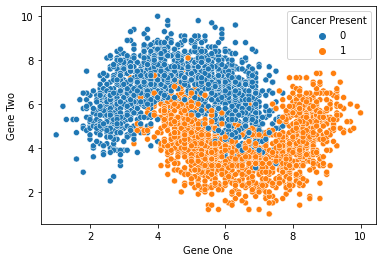

In [11]:
sns.scatterplot(x='Gene One', y='Gene Two', hue='Cancer Present', data=df)

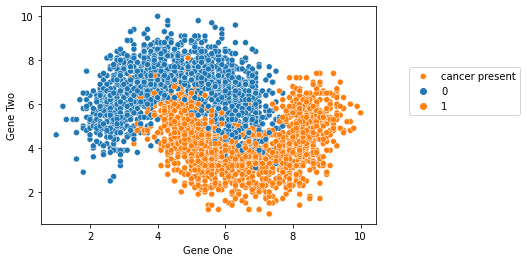

In [21]:
sns.scatterplot(x='Gene One', y='Gene Two', hue='Cancer Present', data=df,label='cancer present')
plt.legend(loc=(1.1,0.5))

## X & y

In [22]:
X = df.drop('Cancer Present', axis=1)
y= df['Cancer Present']

## Train & Test Split

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

## Scaling Data
In KNN We must do Scaling to normalize data

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)  #### by default n_neighbors=5
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## Model Evaluation

In [50]:
y_pred_test = knn_model.predict(X_test)
y_pred_train = knn_model.predict(X_train)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_test)

0.8922222222222222

In [52]:
accuracy_score(y_train,y_pred_train)

0.9780952380952381

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test)

array([[420,  50],
       [ 47, 383]], dtype=int64)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



## Elbow Method for choosing Reasonable K Value
This uses the test set for the hyperparameter selection of K

In [55]:
test_acc =  []
for k in range(1,30,2):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train)
    y_pred_test = knn_model.predict(X_test)
    test_acc_score = accuracy_score(y_test,y_pred_test)
    test_acc.append(test_acc_score)

In [56]:
test_acc

[0.8922222222222222,
 0.9255555555555556,
 0.9277777777777778,
 0.9355555555555556,
 0.94,
 0.9377777777777778,
 0.9377777777777778,
 0.94,
 0.9444444444444444,
 0.9466666666666667,
 0.9455555555555556,
 0.9455555555555556,
 0.9433333333333334,
 0.9444444444444444,
 0.9422222222222222]

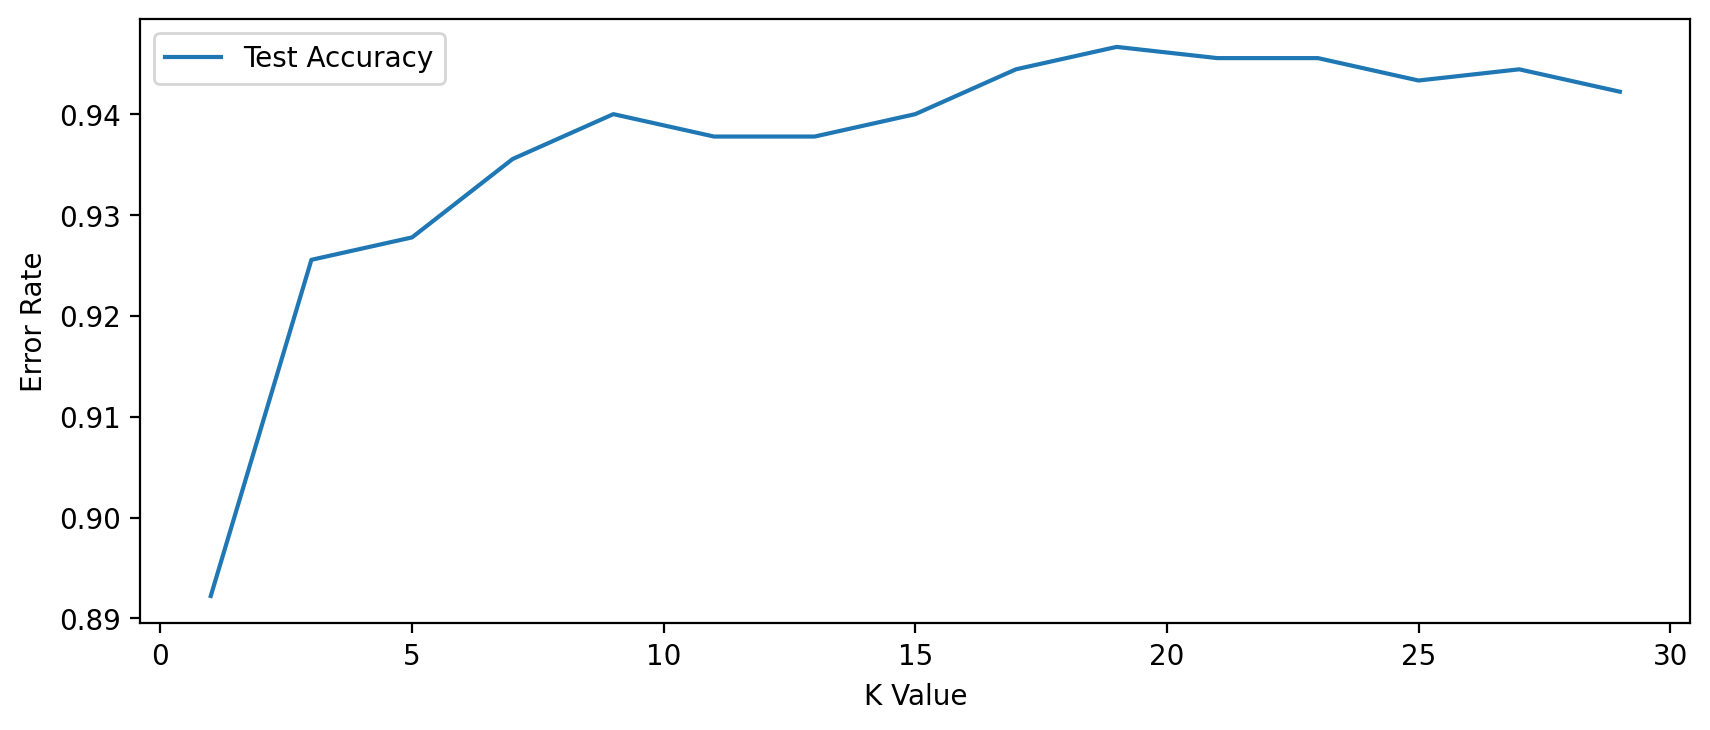

In [61]:
plt.figure(figsize=(10,4),dpi=200)
plt.plot(range(1,30,2),test_acc,label='Test Accuracy')
plt.ylabel('Error Rate')
plt.xlabel('K Value')
plt.legend()
plt.show()

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=19)  #### by default n_neighbors=5
knn_model.fit(X_train,y_train)
y_pred_test = knn_model.predict(X_test)
y_pred_train = knn_model.predict(X_train)
print('Test Accuracy ', accuracy_score(y_test,y_pred_test))
print('Train Accuracy ',accuracy_score(y_train,y_pred_train))

Test Accuracy  0.9466666666666667
Train Accuracy  0.9338095238095238


## KNN Modelling with Hyperparameter tunning( By GridSearchCV )

Choosing K Value

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
param_grid = {'n_neighbors': list(range(1,31)), 'p':[1,2]}

In [77]:
full_cv_classifier = GridSearchCV(knn_model,param_grid,cv=5,scoring='accuracy')

In [79]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=19),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2]},
             scoring='accuracy')

In [80]:
full_cv_classifier.best_params_

{'n_neighbors': 20, 'p': 2}

In [81]:
full_cv_classifier.cv_results_

{'mean_fit_time': array([0.00937529, 0.        , 0.00442657, 0.00243831, 0.00243416,
        0.00082612, 0.00402036, 0.00203414, 0.00624266, 0.        ,
        0.        , 0.00417342, 0.00827794, 0.0008235 , 0.00161409,
        0.00300798, 0.00363417, 0.00200691, 0.00041361, 0.00322847,
        0.00202804, 0.00363326, 0.00082579, 0.00333953, 0.00130191,
        0.        , 0.        , 0.00080457, 0.00374932, 0.00624762,
        0.00130196, 0.        , 0.00130177, 0.        , 0.        ,
        0.00353661, 0.00202498, 0.00244341, 0.00362749, 0.00243607,
        0.0032341 , 0.00312614, 0.00130167, 0.        , 0.00625591,
        0.00313201, 0.00624895, 0.00312538, 0.00312567, 0.00525537,
        0.00059857, 0.00392976, 0.004426  , 0.        , 0.00322084,
        0.00244818, 0.00203838, 0.00243006, 0.        , 0.        ]),
 'std_fit_time': array([0.01875057, 0.        , 0.00613937, 0.00296041, 0.00295098,
        0.00101179, 0.0042132 , 0.0031285 , 0.00764567, 0.        ,
        0.   

In [82]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.90142857, 0.90142857, 0.90333333, 0.90333333, 0.91761905,
       0.91761905, 0.91190476, 0.91190476, 0.92428571, 0.92333333,
       0.92142857, 0.92238095, 0.92571429, 0.9252381 , 0.92285714,
       0.92428571, 0.92333333, 0.9252381 , 0.9247619 , 0.92142857,
       0.92095238, 0.92428571, 0.92333333, 0.92428571, 0.92285714,
       0.92809524, 0.92571429, 0.92904762, 0.92666667, 0.92761905,
       0.92761905, 0.92761905, 0.92809524, 0.92809524, 0.92952381,
       0.92904762, 0.92714286, 0.92714286, 0.92904762, 0.93095238,
       0.92761905, 0.92904762, 0.93095238, 0.93095238, 0.92857143,
       0.92809524, 0.92857143, 0.92857143, 0.92809524, 0.92761905,
       0.92904762, 0.92666667, 0.92952381, 0.92857143, 0.92904762,
       0.92904762, 0.93      , 0.92904762, 0.92857143, 0.93095238])

## Final Model

In [83]:
knn = KNeighborsClassifier(n_neighbors=20,p=2)
knn.fit(X_train,y_train)
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

In [84]:
accuracy_score(y_test,y_pred_test)

0.9466666666666667

In [85]:
accuracy_score(y_train,y_pred_train)

0.9333333333333333

In [86]:
confusion_matrix(y_test,y_pred_test)

array([[451,  19],
       [ 29, 401]], dtype=int64)

In [87]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900

